In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import wavio
import IPython

In [2]:
def lms(x, d, N = 4, mu = 0.05):
    L = min(len(x),len(d))
    h = np.zeros(N)
    e = np.zeros(L-N)
    y = np.zeros(L-N)
    for n in range(L-N):
        x_n = x[n:n+N][::-1]
        d_n = d[n] 
        y_n = np.dot(h, x_n.T)
        y[n] = y_n
        e_n = d_n - y_n
        h = h + mu * e_n * x_n
        e[n] = e_n
    return y, e

def nlms(x, d, N = 4, mu = 0.05):
    L = min(len(x),len(d))
    h = np.zeros(N)
    e = np.zeros(L-N)
    y = np.zeros(L-N)
    for n in range(L-N):
        x_n = x[n:n+N][::-1]
        d_n = d[n] 
        y_n = np.dot(h, x_n.T)
        y[n] = y_n
        e_n = d_n - y_n
        h = h + mu * e_n * x_n / (np.dot(x_n,x_n)+1e-5)
        e[n] = e_n
    return y, e

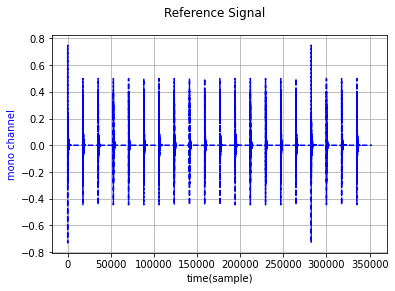

In [3]:
reference_raw = wavio.read("drums.wav")

reference = reference_raw.data[:, 0]
reference = reference.astype(np.float32, order='C') / 32767.0

x_axis = np.arange(len(reference))

plt.suptitle('Reference Signal')
plt.plot(x_axis, reference, 'b--')
plt.ylabel('mono channel', color='b')
plt.grid()

plt.xlabel(r'time(sample)')
plt.show()

IPython.display.display(IPython.display.Audio("drums.wav", rate=reference_raw.rate))

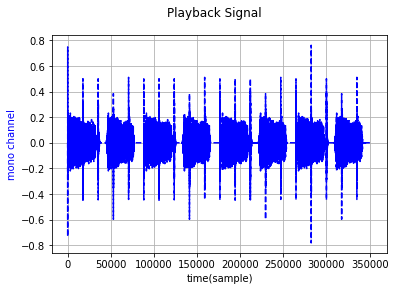

In [4]:
playback_raw = wavio.read("mix.wav")

playback = playback_raw.data[:, 0]
playback = playback.astype(np.float32, order='C') / 32767.0

x_axis = np.arange(len(playback))

plt.suptitle('Playback Signal')
plt.plot(x_axis, playback, 'b--')
plt.ylabel('mono channel', color='b')
plt.grid()

plt.xlabel(r'time(sample)')
plt.show()

IPython.display.display(IPython.display.Audio("mix.wav", rate = playback_raw.rate))

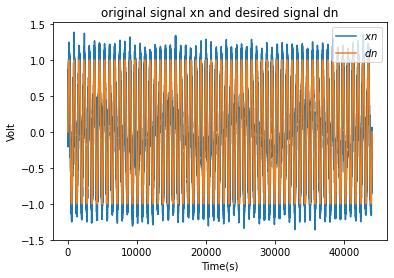

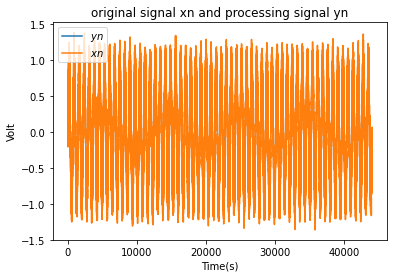

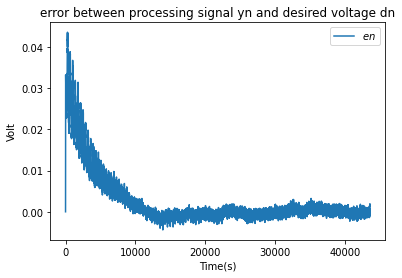

In [5]:
# iteration time
itr = 44100
# FIR taps length
M = 512
# moving steps, learning rate
mu = 0.001 

noise_size = itr
X = np.linspace(0,4 * np.pi, itr, endpoint=True)
Y = np.sin(X * 30)
signal_array = Y
noise_array = np.random.normal(0, 0.1, noise_size)
signal_noise_array = signal_array+noise_array  

xn = signal_noise_array # xn, signal carries interference
dn = signal_array # dn, expected signal
    
#调用LMS算法
yn, en = lms(xn, dn, M, mu)

plt.figure(1)
plt.plot(xn,label="$xn$")
plt.plot(dn,label="$dn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and desired signal dn")
plt.legend() 

plt.figure(2)
plt.plot(yn,label="$yn$")
plt.plot(xn,label="$xn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and processing signal yn")
plt.legend()
    
plt.figure(3)
plt.plot(en,label="$en$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("error between processing signal yn and desired voltage dn")
plt.legend()

plt.show()

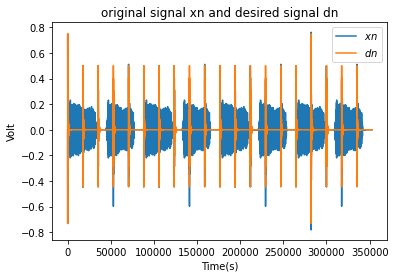

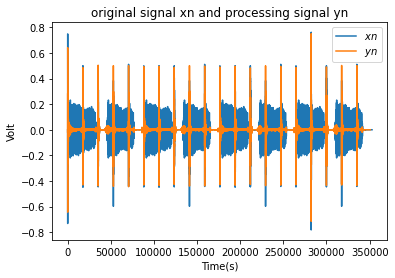

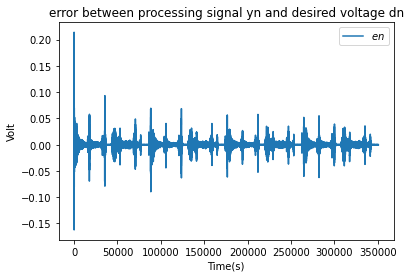

In [6]:
# FIR taps length
M = 2048
# moving steps, learning rate
mu = 0.05

xn = playback # xn, signal carries interference
dn = reference # dn, expected signal
    
#调用LMS算法
(yn,en) = lms(xn, dn, M, mu)

plt.figure(1)
plt.plot(xn,label="$xn$")
plt.plot(dn,label="$dn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and desired signal dn")
plt.legend() 

plt.figure(2)
plt.plot(xn,label="$xn$")
plt.plot(yn,label="$yn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and processing signal yn")
plt.legend()
    
plt.figure(3)
plt.plot(en,label="$en$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("error between processing signal yn and desired voltage dn")
plt.legend()

plt.show()

In [7]:
wavio.write("yn.wav", yn, 44100, sampwidth=3)
wavio.write("en.wav", en, 44100, sampwidth=3)

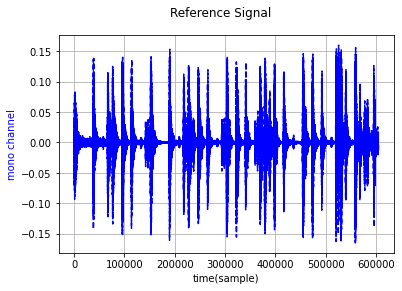

In [8]:
reference_raw = wavio.read("drum_noise.wav")

reference = reference_raw.data[:, 0]
reference = reference.astype(np.float32, order='C') / 32767.0

x_axis = np.arange(len(reference))

plt.suptitle('Reference Signal')
plt.plot(x_axis, reference, 'b--')
plt.ylabel('mono channel', color='b')
plt.grid()

plt.xlabel(r'time(sample)')
plt.show()

IPython.display.display(IPython.display.Audio("drum_noise.wav", rate=reference_raw.rate))

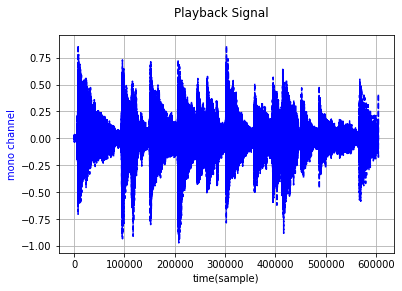

In [9]:
playback_raw = wavio.read("gt_noise.wav")

playback = playback_raw.data[:, 0]
playback = playback.astype(np.float32, order='C') / 32767.0

x_axis = np.arange(len(playback))

plt.suptitle('Playback Signal')
plt.plot(x_axis, playback, 'b--')
plt.ylabel('mono channel', color='b')
plt.grid()

plt.xlabel(r'time(sample)')
plt.show()

IPython.display.display(IPython.display.Audio("gt_noise.wav", rate = playback_raw.rate))

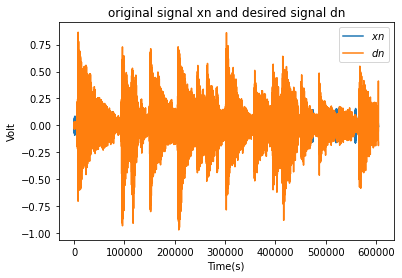

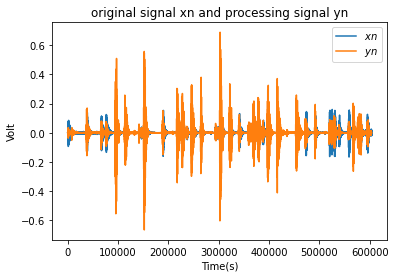

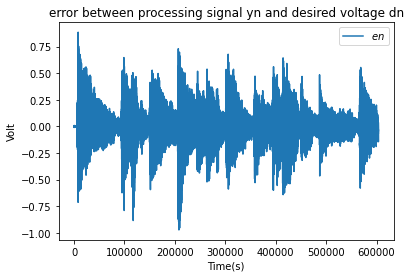

In [10]:
# FIR taps length
M = 1024
# moving steps, learning rate
mu = 0.01

xn = reference # xn, signal carries interference
dn = playback # dn, expected signal
    
#调用LMS算法
(yn,en) = lms(xn, dn, M, mu)

plt.figure(1)
plt.plot(xn,label="$xn$")
plt.plot(dn,label="$dn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and desired signal dn")
plt.legend() 

plt.figure(2)
plt.plot(xn,label="$xn$")
plt.plot(yn,label="$yn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and processing signal yn")
plt.legend()
    
plt.figure(3)
plt.plot(en,label="$en$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("error between processing signal yn and desired voltage dn")
plt.legend()

plt.show()

In [11]:
wavio.write("yn_1.wav", yn, 44100, sampwidth=3)
wavio.write("en_1.wav", en, 44100, sampwidth=3)

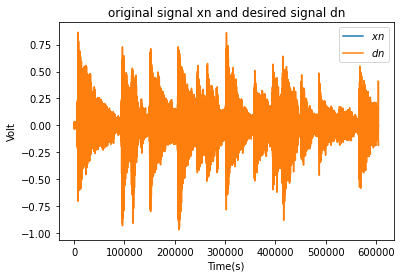

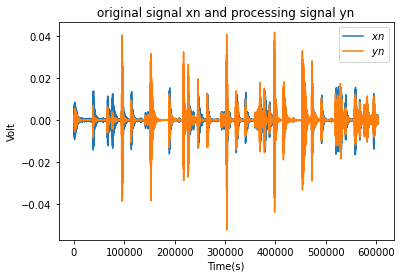

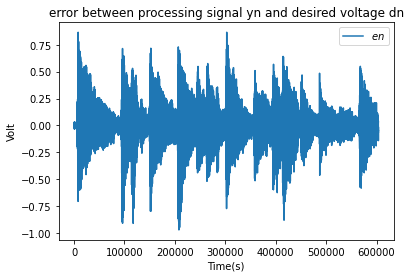

In [12]:
# FIR taps length
M = 1024
# moving steps, learning rate
mu = 0.01

xn = reference*0.1 # xn, signal carries interference
dn = playback # dn, expected signal
    
#调用LMS算法
(yn,en) = lms(xn, dn, M, mu)

plt.figure(1)
plt.plot(xn,label="$xn$")
plt.plot(dn,label="$dn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and desired signal dn")
plt.legend() 

plt.figure(2)
plt.plot(xn,label="$xn$")
plt.plot(yn,label="$yn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and processing signal yn")
plt.legend()
    
plt.figure(3)
plt.plot(en,label="$en$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("error between processing signal yn and desired voltage dn")
plt.legend()

plt.show()

In [13]:
wavio.write("yn_2.wav", yn, 44100, sampwidth=3)
wavio.write("en_2.wav", en, 44100, sampwidth=3)

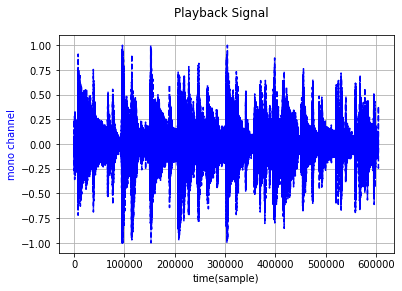

In [14]:
playback_raw = wavio.read("gt_high_noise.wav")

playback = playback_raw.data[:, 0]
playback = playback.astype(np.float32, order='C') / 32767.0

x_axis = np.arange(len(playback))

plt.suptitle('Playback Signal')
plt.plot(x_axis, playback, 'b--')
plt.ylabel('mono channel', color='b')
plt.grid()

plt.xlabel(r'time(sample)')
plt.show()

IPython.display.display(IPython.display.Audio("gt_high_noise.wav", rate = playback_raw.rate))

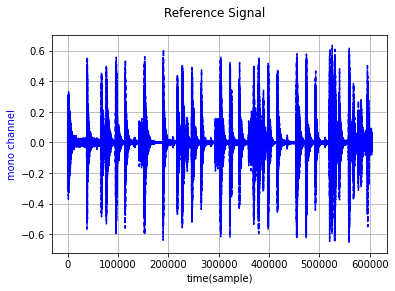

In [15]:
reference_raw = wavio.read("drum_high_noise.wav")

reference = reference_raw.data[:, 0]
reference = reference.astype(np.float32, order='C') / 32767.0

x_axis = np.arange(len(reference))

plt.suptitle('Reference Signal')
plt.plot(x_axis, reference, 'b--')
plt.ylabel('mono channel', color='b')
plt.grid()

plt.xlabel(r'time(sample)')
plt.show()

IPython.display.display(IPython.display.Audio("drum_high_noise.wav", rate=reference_raw.rate))

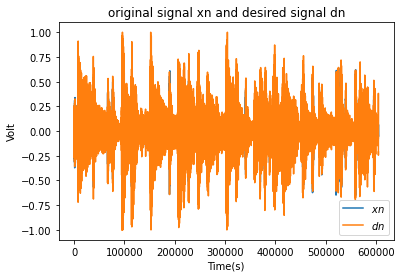

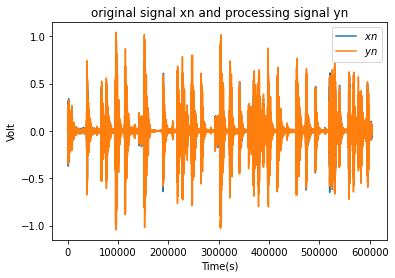

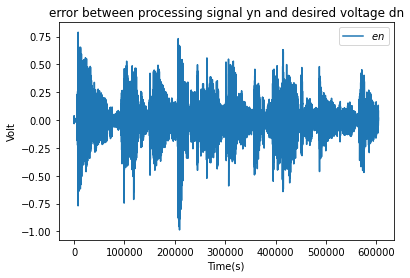

In [16]:
# FIR taps length
M = 512
# moving steps, learning rate
mu = 0.02

xn = reference # xn, signal carries interference
dn = playback # dn, expected signal
    
#调用LMS算法
(yn,en) = lms(xn, dn, M, mu)

plt.figure(1)
plt.plot(xn,label="$xn$")
plt.plot(dn,label="$dn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and desired signal dn")
plt.legend() 

plt.figure(2)
plt.plot(xn,label="$xn$")
plt.plot(yn,label="$yn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and processing signal yn")
plt.legend()
    
plt.figure(3)
plt.plot(en,label="$en$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("error between processing signal yn and desired voltage dn")
plt.legend()

plt.show()

In [17]:
wavio.write("yn_3.wav", yn, 44100, sampwidth=3)
wavio.write("en_3.wav", en, 44100, sampwidth=3)

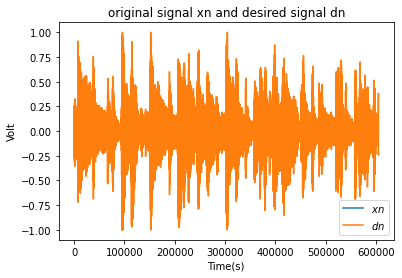

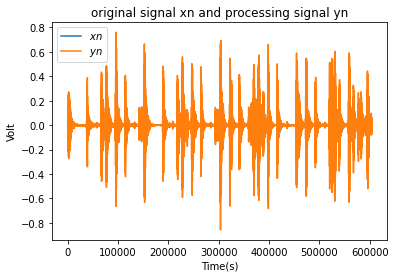

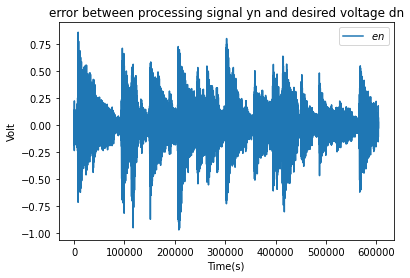

In [18]:
# FIR taps length
M = 512
# moving steps, learning rate
mu = 0.02

xn = reference * 0.1 # xn, signal carries interference
dn = playback # dn, expected signal
    
#调用LMS算法
(yn,en) = lms(xn, dn, M, mu)

plt.figure(1)
plt.plot(xn,label="$xn$")
plt.plot(dn,label="$dn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and desired signal dn")
plt.legend() 

plt.figure(2)
plt.plot(xn,label="$xn$")
plt.plot(yn,label="$yn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and processing signal yn")
plt.legend()
    
plt.figure(3)
plt.plot(en,label="$en$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("error between processing signal yn and desired voltage dn")
plt.legend()

plt.show()

In [19]:
wavio.write("yn_4.wav", yn, 44100, sampwidth=3)
wavio.write("en_4.wav", en, 44100, sampwidth=3)